# General extra plots

In [2]:
pages_scanbank_dir = '/Users/jnaiman/Dropbox/wwt_image_extraction/FigureLocalization/BenchMarks/Pages_scanbank/RandomSingleFromPDFIndexed/'
pages_publaynet_dir = '/Users/jnaiman/Dropbox/wwt_image_extraction/FigureLocalization/BenchMarks/Pages_pmcnoncom/RandomSingleFromPDFIndexed/'
pages_ours_dir = '/Users/jnaiman/Dropbox/wwt_image_extraction/FigureLocalization/Pages/RandomSingleFromPDFIndexed/'

save_dir = '/Users/jnaiman/Dropbox/wwt_image_extraction/FigureLocalization/paper2/ref_figures/'

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import json
import pandas as pd
import cv2 as cv

### Visually compare PubLayNet, ours and ScanBank

In [4]:
scanbank = '1721_1_11504_p10.jpeg' # FUEL CELLS: EFFECT OF CURRENT ON THE GAS-SOLUTION-ELECTRODE INTERFACE CONTACT ANGLE, 1962
publaynet = '10.1177_0300060520931608.PMC7297492_p3.jpeg' # Abdominal aortic rupture after extracorporeal shockwave lithotripsy: A rare case report and literature review, 2020
ours = '1987ApJ___312__134V_p3.jpeg'

figures = [scanbank, publaynet, ours]
dirs = [pages_scanbank_dir,pages_publaynet_dir,pages_ours_dir]
titles = ['ScanBank ETD, 1962', 'PubLayNet, 2022', 'Ours, 1987']

In [5]:
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [6]:
import cv2
def drawline(img,pt1,pt2,color,thickness=1,style='dotted',gap=20):
    dist =((pt1[0]-pt2[0])**2+(pt1[1]-pt2[1])**2)**.5
    pts= []
    for i in  np.arange(0,dist,gap):
        r=i/dist
        x=int((pt1[0]*(1-r)+pt2[0]*r)+.5)
        y=int((pt1[1]*(1-r)+pt2[1]*r)+.5)
        p = (x,y)
        pts.append(p)

    if style=='dotted':
        for p in pts:
            cv2.circle(img,p,thickness,color,-1)
    else:
        s=pts[0]
        e=pts[0]
        i=0
        for p in pts:
            s=e
            e=p
            if i%2==1:
                cv2.line(img,s,e,color,thickness)
            i+=1

def drawpoly(img,pts,color,thickness=1,style='dotted',gap=20):
    s=pts[0]
    e=pts[0]
    pts.append(pts.pop(0))
    for p in pts:
        s=e
        e=p
        drawline(img,s,e,color,thickness,style,gap=gap)

def drawrect(img,pt1,pt2,color,thickness=1,style='dotted',gap=20):
    pts = [pt1,(pt2[0],pt1[1]),pt2,(pt1[0],pt2[1])] 
    drawpoly(img,pts,color,thickness,style,gap=gap)

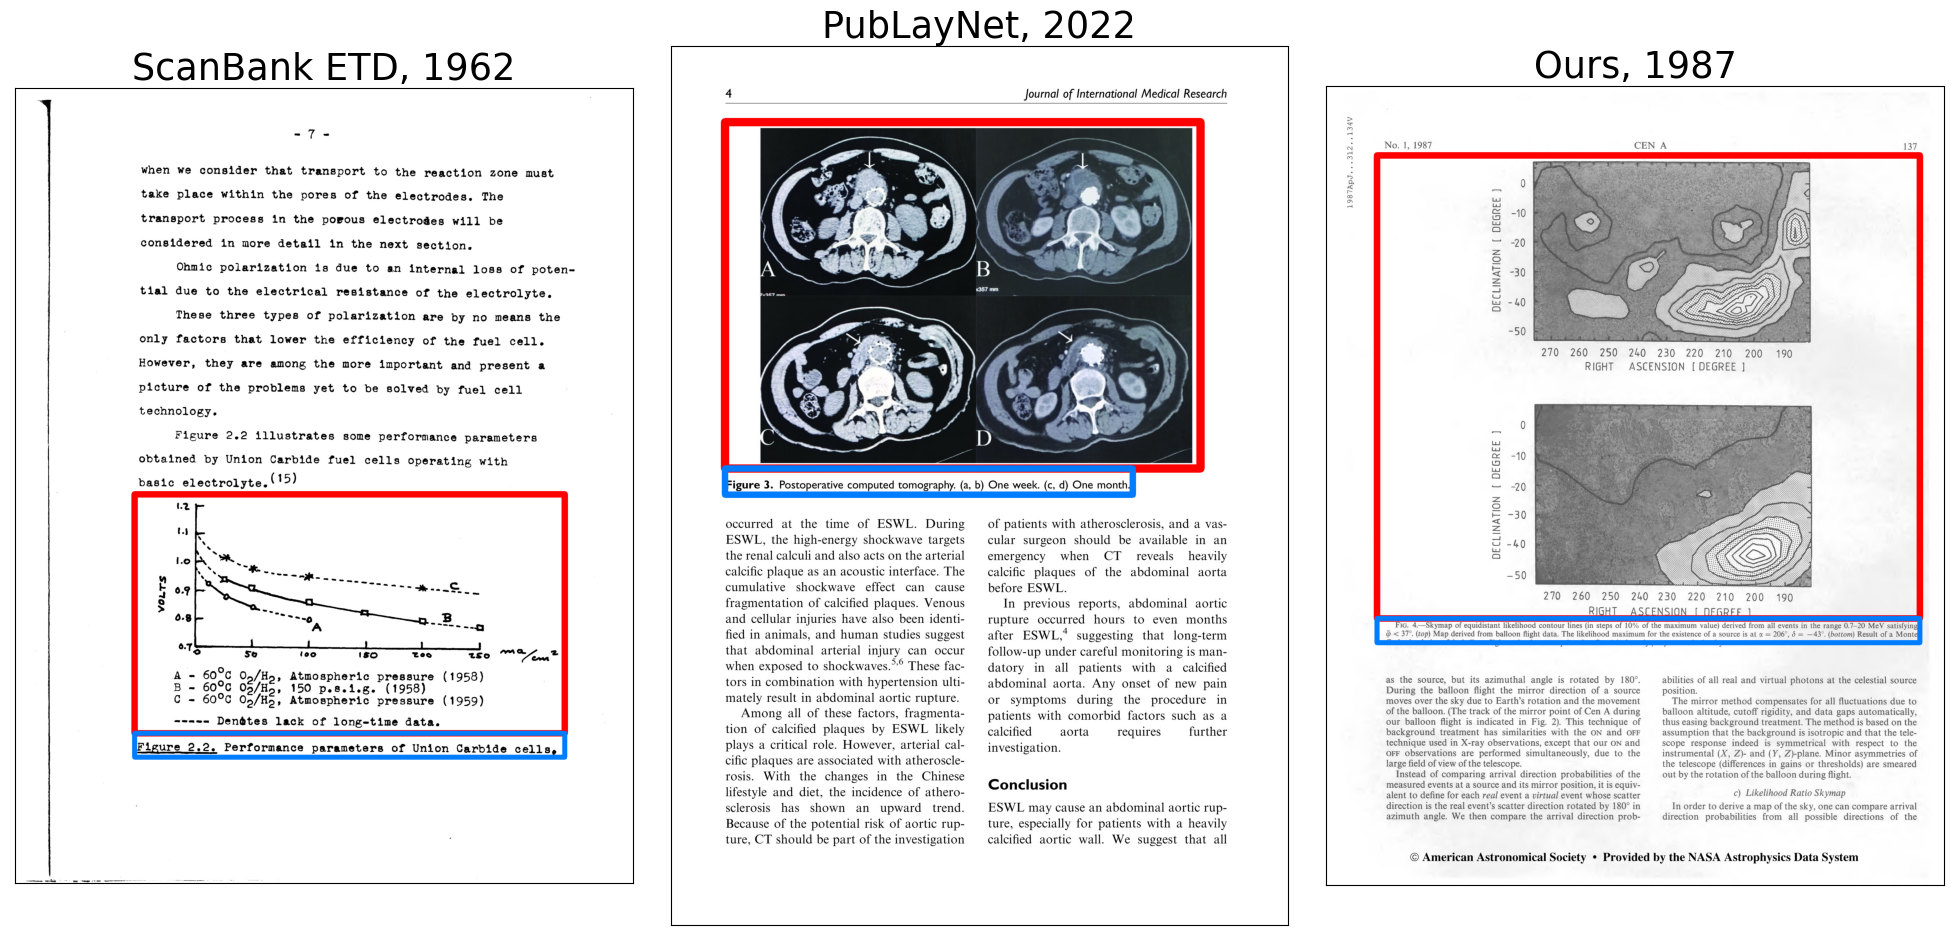

In [47]:
fig,ax = plt.subplots(1,3, figsize=(20,10))

fig_col = (255,0,0)
cap_col = (0,125,255)
fig_thick = 25
cap_thick = 20
fontsize_title = 40
style = 'dashed'
gap=40

# # --- ffd ----
# # xmin,xmax, ymin,ymax
# boxes = [ [275,1180,110,730], 
#          [1340,2245,110,730] ]
# imgffd = imgcrop.copy()
# for b in boxes:
#     cv.rectangle(imgffd, (b[0],b[2]), (b[1],b[3]), fig_col, fig_thick)
    
# # caption
# boxes_cap = [ [70,2300,865,965] ]
# for b in boxes_cap:
#     #cv.rectangle(imgffd, (b[0],b[2]), (b[1],b[3]), cap_col, cap_thick)
#     #drawrect(img,pt1,pt2,color,thickness=1,style='dotted')
#     drawrect(imgffd, (b[0],b[2]), (b[1],b[3]), cap_col, thickness=cap_thick, 
#              style=style, gap=gap)

# xmin,xmax, ymin, ymax
boxes_scan_fig = [ [500,2300,1700,2700] ]
boxes_scan_cap = [ [500,2300,2700,2800] ]

boxes_pub_fig = [ [175,1720, 250,1375 ] ]
boxes_pub_cap = [ [175,1500,1375,1460 ] ]

boxes_us_fig = [[210,2450,290,2200]]
boxes_us_cap = [[210,2450,2200,2300]]

boxes_fig = [boxes_scan_fig, boxes_pub_fig, boxes_us_fig]
boxes_cap = [boxes_scan_cap, boxes_pub_cap, boxes_us_cap]

for i,(f,d,t,bf,bc) in enumerate(zip(figures,dirs,titles,boxes_fig,boxes_cap)):
    im = np.array(Image.open(d+f).convert('RGB'))
    for b in bf:
        cv.rectangle(im, (b[0],b[2]), (b[1],b[3]), fig_col, fig_thick)
    for b in bc:
        cv.rectangle(im, (b[0],b[2]), (b[1],b[3]), cap_col, cap_thick)
    ax[i].imshow(im)
    ax[i].set_title(t)
    # for major ticks
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    # for minor ticks
    ax[i].set_xticks([], minor=True)
    ax[i].set_yticks([], minor=True)
    
fig.tight_layout()
fig.savefig(save_dir + 'scanbank_publaynet_viz_compare.pdf')
plt.show()

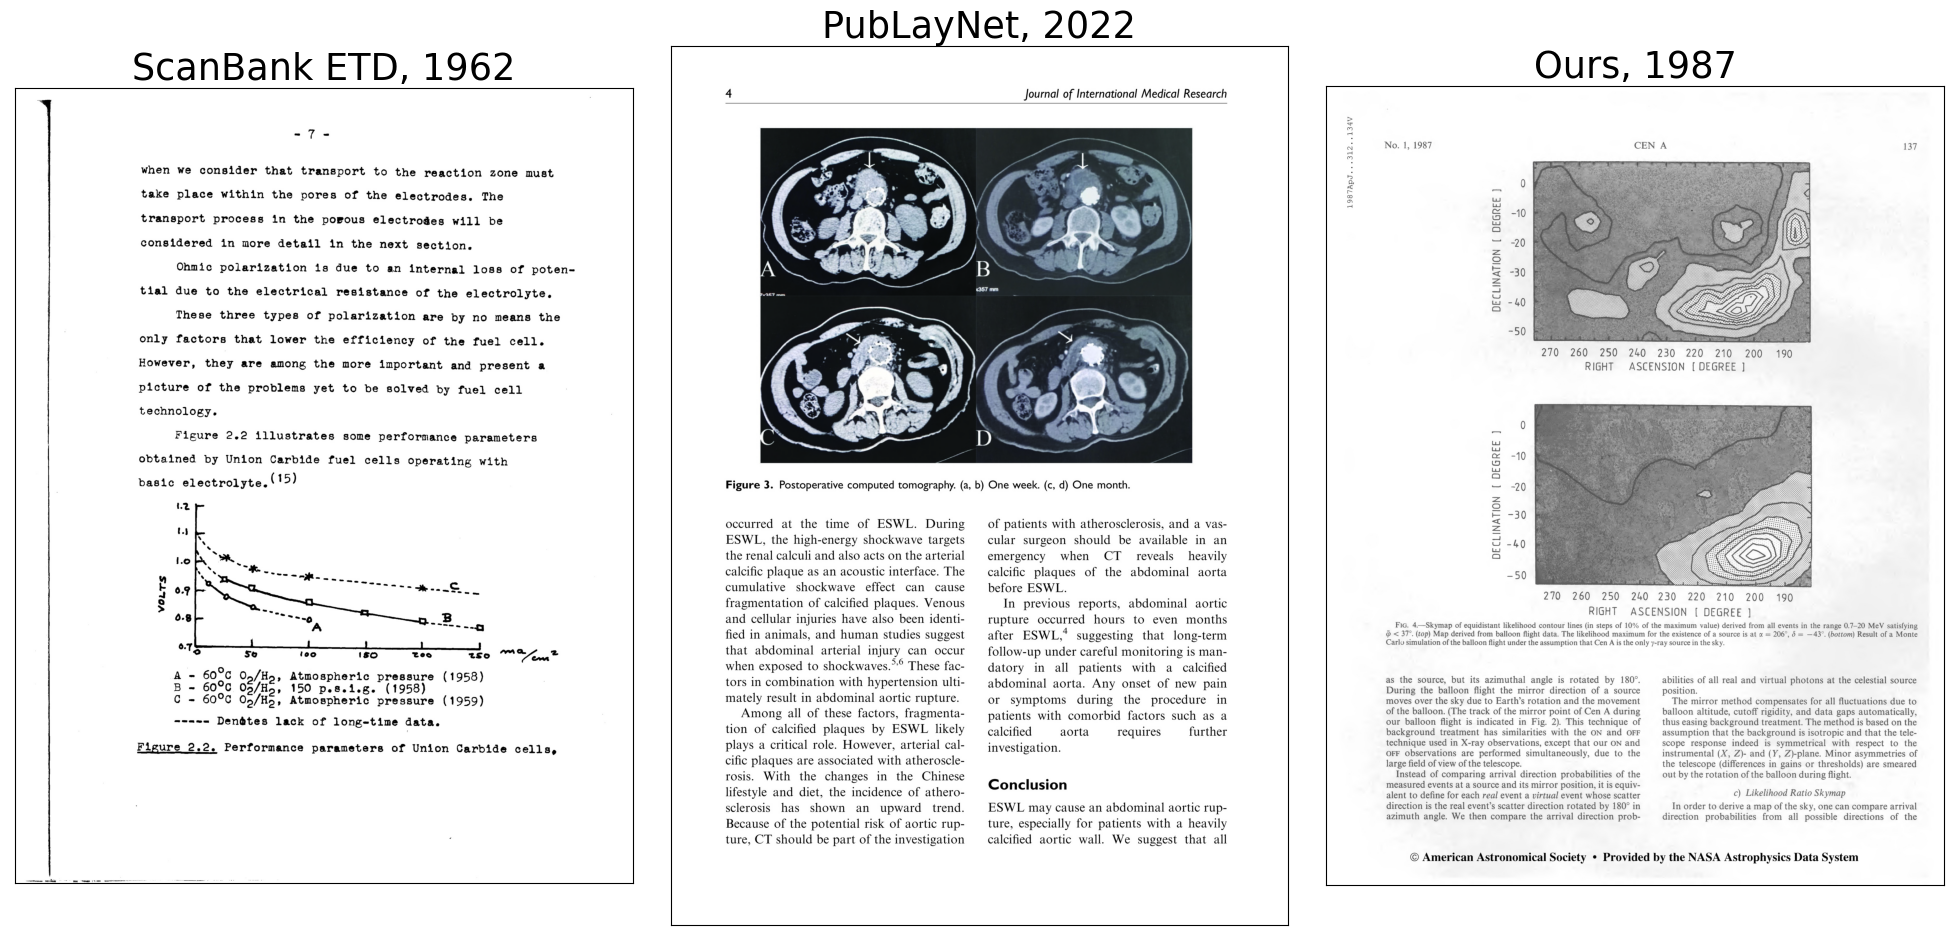

In [8]:
# now add some outlines for figs and captions:

fig,ax = plt.subplots(1,3, figsize=(20,10))
for i,(f,d,t) in enumerate(zip(figures,dirs,titles)):
    im = np.array(Image.open(d+f).convert('RGB'))
    ax[i].imshow(im)
    ax[i].set_title(t)
    # for major ticks
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    # for minor ticks
    ax[i].set_xticks([], minor=True)
    ax[i].set_yticks([], minor=True)
    
fig.tight_layout()
fig.savefig(save_dir + 'scanbank_publaynet_viz_compare_withBoxes.pdf')
plt.show()

### ScanBank subject type

In [27]:
# downloaded from https://zenodo.org/record/4663578#.Y9bqMuzMJGA
scanbank_metadata = '/Users/jnaiman/Dropbox/wwt_image_extraction/FigureLocalization/BenchMarks/data/scanbank/metadata.json'

In [37]:
# with open(scanbank_metadata,'r') as f:
#     metadata = json.load(f)

In [35]:
# subject = []
# for key in metadata.keys():
#     x = metadata[key]
#     subject.append(
    
#     import sys; sys.exit()

In [43]:
metadata_in = pd.read_json(scanbank_metadata).T

In [44]:
metadata_in.head()

,dc.contributor.advisor,dc.contributor.author,dc.contributor.other,dc.date.accessioned,dc.date.available,dc.date.copyright,dc.date.issued,dc.identifier.uri,dc.description,dc.description.statementofresponsibility,...,dc.description.degree,dc.contributor.department,dc.identifier.oclc,dc.format.mimetype,dc.title.alternative,dc.subject.lcsh,dc.relation.ispartofseries,dc.coverage.spatial,dc.description.abstract,dc.subject.lcc
1721.1/97289,"[François M. M. Morel., en_US]","[Dzombak, David Adam, en_US]",[Massachusetts Institute of Technology. Depart...,"[2015-06-10T19:06:04Z, None]","[2015-06-10T19:06:04Z, None]","[1986, en_US]","[1986, en_US]","[http://hdl.handle.net/1721.1/97289, None]","[Includes bibliographies., en_US]","[by David Adam Dzombak., en_US]",...,"[Ph.D., en_US]",[Massachusetts Institute of Technology. Depart...,"[15804073, en_US]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1721.1/29848,"[Stephen H. Crandall., en_US]","[Gans, Bruce E, en_US]",[Massachusetts Institute of Technology. Dept. ...,"[2006-03-24T17:56:48Z, None]","[2006-03-24T17:56:48Z, None]",NaN,"[1983, en_US]","[http://hdl.handle.net/1721.1/29848, None]","[Includes bibliographical references., en_US]","[by Bruce E. Gans., en_US]",...,"[Mech.E, en_US]",[Massachusetts Institute of Technology. Depart...,"[11309435, en_US]","[application/pdf, None]",NaN,NaN,NaN,NaN,NaN,NaN
1721.1/74370,"[Kent W. Colton., en_US]","[Dickstein, Dennis Ira, en_US]",NaN,"[2012-10-26T18:03:43Z, None]","[2012-10-26T18:03:43Z, None]",NaN,"[1974, en_US]","[http://hdl.handle.net/1721.1/74370, None]",[Massachusetts Institute of Technology. Dept. ...,NaN,...,"[B.S., en_US]",[Massachusetts Institute of Technology. Depart...,"[25979086, en_US]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1721.1/77675,"[Phillip L. Clay., en_US]","[Sylvan, Theodore, en_US]",[Massachusetts Institute of Technology. Dept. ...,"[2013-03-13T15:33:51Z, None]","[2013-03-13T15:33:51Z, None]","[1985, en_US]","[1985, en_US]","[http://hdl.handle.net/1721.1/77675, None]","[Bibliography: leaves 152-157., en_US]","[by Theodore Sylvan., en_US]",...,"[B.S., en_US]",[Massachusetts Institute of Technology. Depart...,"[13721212, en_US]",NaN,"[Boston area, The incidence of real estate tax...",NaN,NaN,NaN,NaN,NaN
1721.1/17465,"[James R. Melcher., en_US]","[Regan, James Peter, en_US]",NaN,"[2005-06-02T15:20:59Z, None]","[2005-06-02T15:20:59Z, None]",NaN,"[1968, en_US]","[http://hdl.handle.net/1721.1/17465, None]",[Includes bibliographical references (leaves 6...,"[by James Peter Regan., en_US]",...,"[Nav.E, en_US]",[Massachusetts Institute of Technology. Depart...,"[41080468, en_US]","[application/pdf, None]",NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
subjects = []; index = []
for i in range(len(metadata_in)):
    d = metadata_in.iloc[i]
    subjects.append(d['dc.subject'][0].replace('.',''))
    index.append(d.name)
    
metadata = pd.DataFrame({'file':index, 'subject':subjects})

<AxesSubplot:>

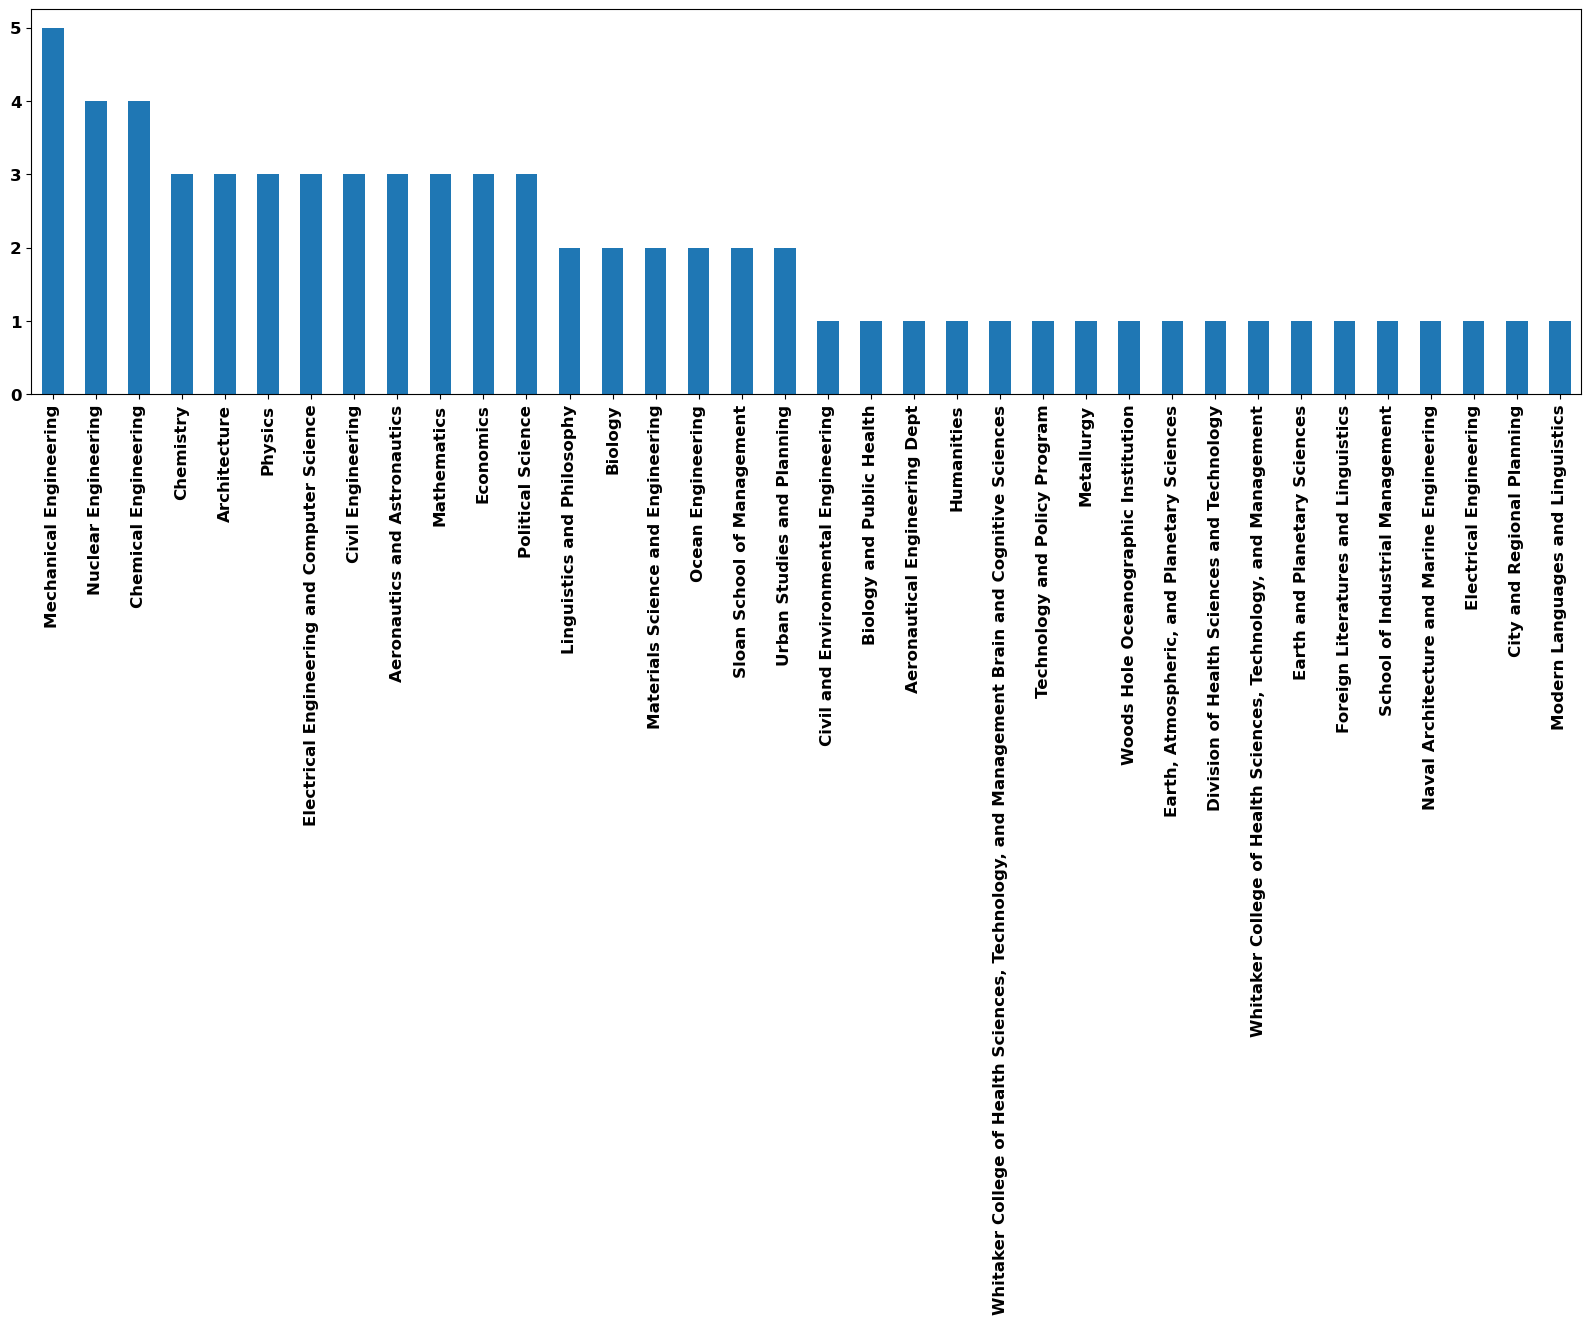

In [62]:
metadata['subject'].value_counts().plot(kind='bar',figsize=(20,5),fontsize=12)

In [63]:
len(metadata['subject'].unique())

36

In [64]:
metadata['subject'].unique()

array(['Civil Engineering', 'Mechanical Engineering',
       'Urban Studies and Planning', 'Economics', 'Mathematics',
       'City and Regional Planning', 'Electrical Engineering',
       'Nuclear Engineering',
       'Electrical Engineering and Computer Science',
       'Naval Architecture and Marine Engineering',
       'Chemical Engineering', 'Physics',
       'School of Industrial Management',
       'Foreign Literatures and Linguistics', 'Ocean Engineering',
       'Sloan School of Management', 'Earth and Planetary Sciences',
       'Chemistry', 'Earth, Atmospheric, and Planetary Sciences',
       'Biology', 'Architecture', 'Materials Science and Engineering',
       'Whitaker College of Health Sciences, Technology, and Management',
       'Political Science', 'Aeronautics and Astronautics',
       'Division of Health Sciences and Technology', 'Humanities',
       'Woods Hole Oceanographic Institution',
       'Civil and Environmental Engineering',
       'Aeronautical Engineerin

Look for specific ETD types:

In [66]:
msub = metadata.loc[metadata['subject'] == 'Modern Languages and Linguistics']
msub

,file,subject
63,1721.1/13003,Modern Languages and Linguistics


## Make the comparison of boxes fig

In [81]:
codebook_fig = 'codebook_diagram_new.pdf'

In [80]:
#fig_name = '1990AJ____100_1766P_p3.jpeg'
# maybe:
#1990AJ____100__193M_p23.jpeg
#1990AJ____100__604C_p54.jpeg
#1990AJ_____99_1789B_p9.jpeg
# 1990AJ_____99_2019L_p45.jpeg (less clear)
# 1990AJ_____99__846H_p11.jpeg (vertical stack)
# 1990ApJS___72___75O_p36.jpeg sideby side, bigger
fig_name = '1990ApJS___72___75O_p36.jpeg'

img = np.array(Image.open(pages_ours_dir+fig_name).convert('RGB'))

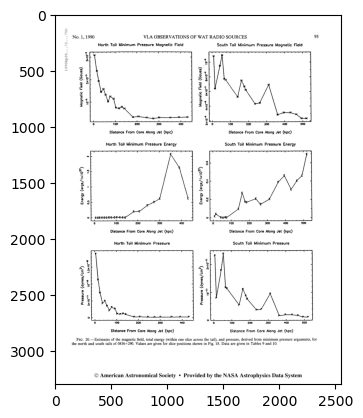

In [12]:
plt.imshow(img)

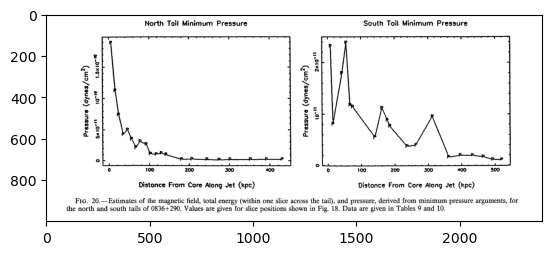

In [19]:
ymin = 2000
ymax = 3000
xmin = 50
xmax = 2500-50

imgcrop = img[ymin:ymax, xmin:xmax]

plt.imshow(imgcrop)

Draw all boxes:

saved: /Users/jnaiman/Dropbox/wwt_image_extraction/FigureLocalization/paper2/ref_figures/codebook_diagram_new.pdf


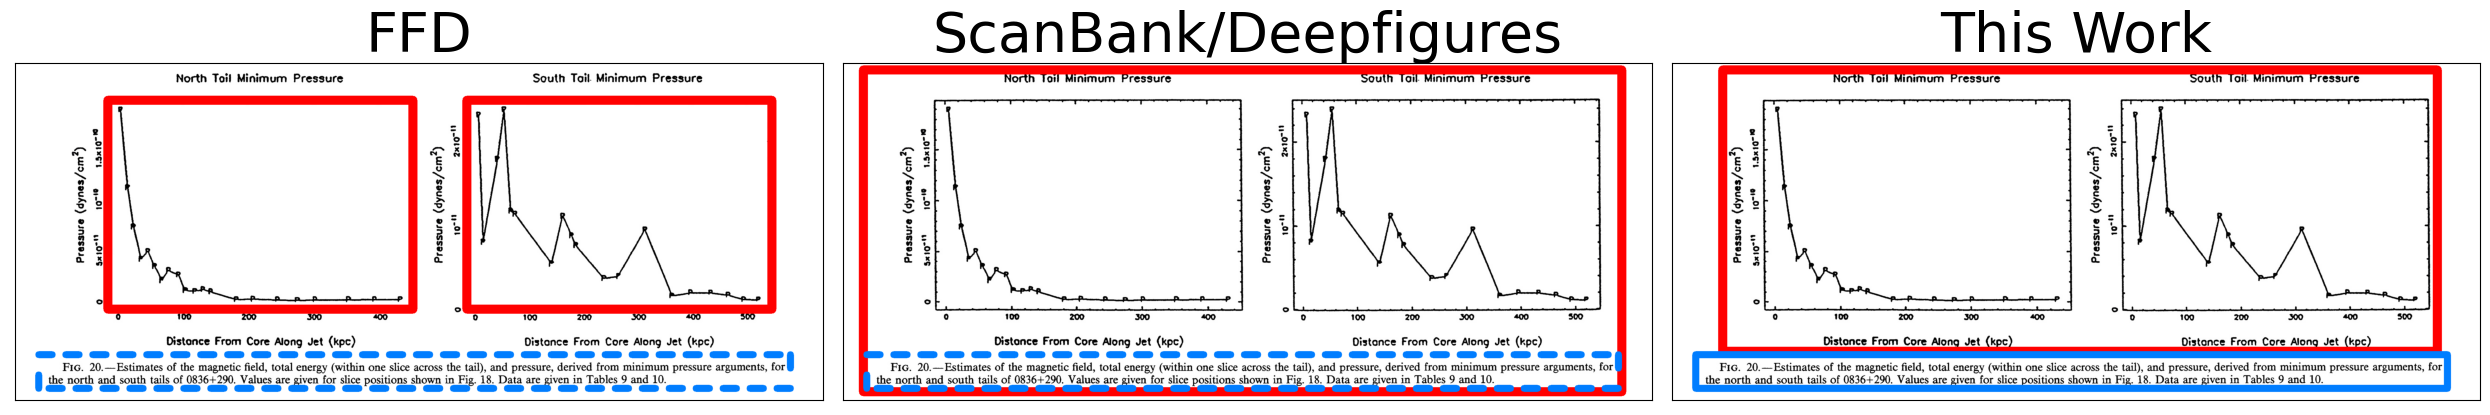

In [102]:
fig, ax = plt.subplots(1,3,figsize=(25,4.5))

fig_col = (255,0,0)
cap_col = (0,125,255)
fig_thick = 25
cap_thick = 20
fontsize_title = 40
style = 'dashed'
gap=40

# --- ffd ----
# xmin,xmax, ymin,ymax
boxes = [ [275,1180,110,730], 
         [1340,2245,110,730] ]
imgffd = imgcrop.copy()
for b in boxes:
    cv.rectangle(imgffd, (b[0],b[2]), (b[1],b[3]), fig_col, fig_thick)
    
# caption
boxes_cap = [ [70,2300,865,965] ]
for b in boxes_cap:
    #cv.rectangle(imgffd, (b[0],b[2]), (b[1],b[3]), cap_col, cap_thick)
    #drawrect(img,pt1,pt2,color,thickness=1,style='dotted')
    drawrect(imgffd, (b[0],b[2]), (b[1],b[3]), cap_col, thickness=cap_thick, 
             style=style, gap=gap)
       
ax[0].imshow(imgffd)
ax[0].set_title('FFD',fontsize=fontsize_title)

# --- deepfigures/scanbank ----
# xmin,xmax, ymin,ymax
boxes = [ [60,2310,20,975] ]
imgsb = imgcrop.copy()
for b in boxes:
    cv.rectangle(imgsb, (b[0],b[2]), (b[1],b[3]), fig_col, fig_thick)
    
# caption
boxes_cap = [ [70,2300,865,965] ]
for b in boxes_cap:
    #cv.rectangle(imgsb, (b[0],b[2]), (b[1],b[3]), cap_col, cap_thick)
    drawrect(imgsb, (b[0],b[2]), (b[1],b[3]), cap_col, thickness=cap_thick, 
             style=style, gap=gap)

ax[1].imshow(imgsb)
ax[1].set_title('ScanBank/Deepfigures',fontsize=fontsize_title)


# --- ours ----
# xmin,xmax, ymin,ymax
boxes = [ [150,2270,20,855] ]
imgus = imgcrop.copy()
for b in boxes:
    cv.rectangle(imgus, (b[0],b[2]), (b[1],b[3]), fig_col, fig_thick)
    
# caption
boxes_cap = [ [70,2300,865,965] ]
for b in boxes_cap:
    cv.rectangle(imgus, (b[0],b[2]), (b[1],b[3]), cap_col, cap_thick)
       
ax[2].imshow(imgus)
ax[2].set_title('This Work',fontsize=fontsize_title)


# eventually:
for a in ax:
    # for major ticks
    a.set_xticks([])
    a.set_yticks([])
    # for minor ticks
    a.set_xticks([], minor=True)
    a.set_yticks([], minor=True)
    
fig.tight_layout()
fig.savefig(save_dir + codebook_fig)
print('saved:', save_dir + codebook_fig)